# **TP2 : Supervised Learning by using Multi-Layer Perceptron (MLP) with sklearn**
---



In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time, random 

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, zero_one_loss

## **0. Load dataset**

### Load MNIST dataset

In [0]:
# import data
mnist = fetch_openml('mnist_784')

In [0]:
images = mnist.data.reshape((-1,28,28))
data = mnist.data
target = mnist.target
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of target : ", target.shape)

Shape of training images :  (70000, 28, 28)
Shape of training data :  (70000, 784)
Shape of target :  (70000,)


In [0]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Normalize data

In [0]:
# normalize all pixels into float(0,1)
data = data / 255.

### Split training & test set

In [0]:
X_train, X_test = data[:49000], data[49000:]
y_train, y_test = target[:49000], target[49000:]
print("Traning data shape : ", X_train.shape)
print("Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Traning data shape :  (49000, 784)
Traning target shape :  (49000,)
Testing data shape :  (21000, 784)
Testing target shape :  (21000,)


## **1. Build and train a simple MLP Classifier with MNIST dataset**

### Build a simple MLP classifier

In [0]:
%%time 
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,verbose=1)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.58489025
Iteration 2, loss = 0.27410018
Iteration 3, loss = 0.22224941
Iteration 4, loss = 0.18977677
Iteration 5, loss = 0.16543236
Iteration 6, loss = 0.14842653
Iteration 7, loss = 0.13429350
Iteration 8, loss = 0.12333301
Iteration 9, loss = 0.11206835
Iteration 10, loss = 0.10352227
Iteration 11, loss = 0.09550936
Iteration 12, loss = 0.08915442
Iteration 13, loss = 0.08292552
Iteration 14, loss = 0.07806628
Iteration 15, loss = 0.07236567
Iteration 16, loss = 0.06821404
Iteration 17, loss = 0.06432106
Iteration 18, loss = 0.06032730
Iteration 19, loss = 0.05701206
Iteration 20, loss = 0.05433133
Iteration 21, loss = 0.05056616
Iteration 22, loss = 0.04814988
Iteration 23, loss = 0.04491279
Iteration 24, loss = 0.04290237
Iteration 25, loss = 0.03997616
Iteration 26, loss = 0.03799482
Iteration 27, loss = 0.03615637
Iteration 28, loss = 0.03370758
Iteration 29, loss = 0.03205965
Iteration 30, loss = 0.03042365


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.992449
Test set score: 0.968333
CPU times: user 43.3 s, sys: 18.3 s, total: 1min 1s
Wall time: 31.9 s



### Predict some tests

Pred:5 / proba_score:0.9845886675390655


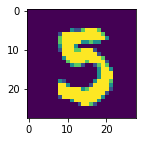

Pred:5 / proba_score:0.9933261913999767


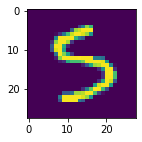

Pred:9 / proba_score:0.9991762085515841


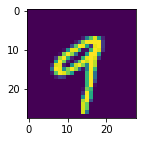

Pred:7 / proba_score:0.9997519250743713


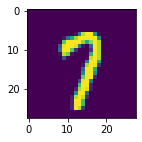

Pred:5 / proba_score:0.9988033580296714


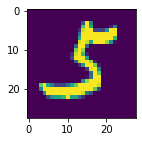

In [0]:
for i in range(5):
    plt.figure(figsize=(3,2))
    idx = np.random.randint(len(X_test))
    y_pred = mlp.predict([X_test[idx]])
    y_proba = np.max(mlp.predict_proba([X_test[idx]]))
    plt.imshow(X_test[idx].reshape(28,28))
    print("Pred:{} / proba_score:{}".format(y_pred[0],y_proba))
    plt.show()

### Compute score

In [0]:
y_pred = mlp.predict(X_test)
precision_score(y_test,y_pred,labels = target_list,average='micro')

0.9683333333333334

### Compute Zero-One Loss 

In [0]:
zero_one_loss(y_test, y_pred)

0.03166666666666662

### Classification Report

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2078
           1       0.98      0.99      0.99      2307
           2       0.97      0.97      0.97      2123
           3       0.96      0.97      0.96      2155
           4       0.97      0.97      0.97      2051
           5       0.96      0.95      0.96      1907
           6       0.98      0.98      0.98      2021
           7       0.98      0.97      0.97      2217
           8       0.96      0.96      0.96      2074
           9       0.96      0.96      0.96      2067

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



## **2. Precision-Recall Curve & ROC Curve**

In [0]:
X = data
y = label_binarize(target, classes=target_list)
X_train_ovr, X_test_ovr, y_train_ovr ,y_test_ovr = train_test_split(X,y,train_size=0.8)

In [0]:
%%time
clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=50,verbose=0))
clf.fit(X_train_ovr, y_train_ovr)

y_score_ovr = clf.predict_proba(X_test_ovr)

CPU times: user 11min 15s, sys: 4min 34s, total: 15min 50s
Wall time: 8min 3s


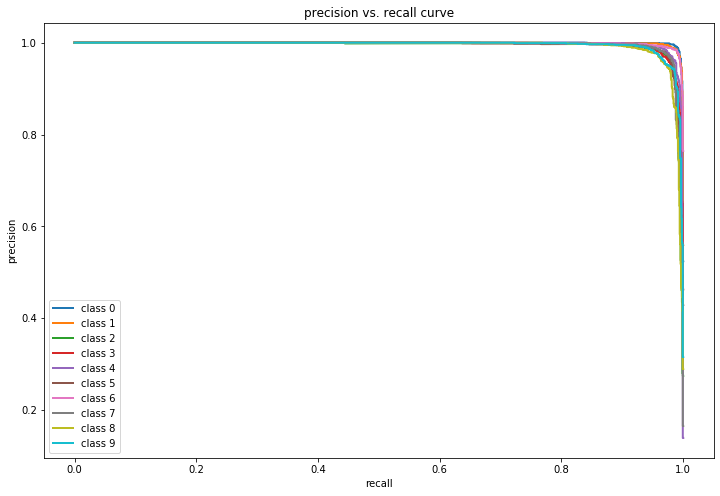

In [0]:
# precision recall curve
plt.figure(figsize=(12,8))
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test_ovr[:, i],
                                                        y_score_ovr[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

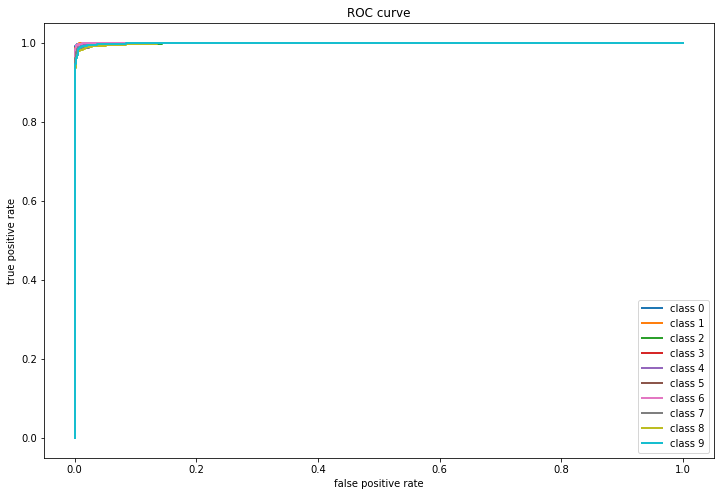

In [0]:
# roc curve
plt.figure(figsize=(12,8))

fpr = dict()
tpr = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_ovr[:, i],
                                  y_score_ovr[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

## **3. Parameter tuning for MLP**

### ***3.0. Number of neurons***

In [0]:
%%time
layers_sizes = []
training_scores, training_loss = [], []
test_scores, test_loss = [], []
training_time = []
nb_neurons = np.arange(10,101,10)
for i in nb_neurons:
  print("Training with 1 hidden layer of {} neurons(s) ...".format(i))
  mlp = MLPClassifier(hidden_layer_sizes=i,verbose=0)
  start = time.clock()
  mlp.fit(X_train,y_train)
  exec_time = time.clock() - start 
  training_time.append(exec_time)
  print("Execution time : ", exec_time)
  training_scores.append(mlp.score(X_train, y_train))
  test_scores.append(mlp.score(X_test, y_test))
  training_loss.append(zero_one_loss(y_train,mlp.predict(X_train)))
  test_loss.append(zero_one_loss(y_test,mlp.predict(X_test)))

Training with 1 hidden layer of 10 neurons(s) ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Execution time :  219.07225399999993
Training with 1 hidden layer of 20 neurons(s) ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Execution time :  266.04531799999995
Training with 1 hidden layer of 30 neurons(s) ...
Execution time :  275.11578599999984
Training with 1 hidden layer of 40 neurons(s) ...
Execution time :  195.33747800000015
Training with 1 hidden layer of 50 neurons(s) ...
Execution time :  200.62877200000025
Training with 1 hidden layer of 60 neurons(s) ...
Execution time :  164.72689000000037
Training with 1 hidden layer of 70 neurons(s) ...
Execution time :  184.80098999999973
Training with 1 hidden layer of 80 neurons(s) ...
Execution time :  199.0518689999999
Training with 1 hidden layer of 90 neurons(s) ...
Execution time :  182.75538300000017
Training with 1 hidden layer of 100 neurons(s) ...
Execution time :  198.14131199999974
CPU times: user 24min 36s, sys: 10min 37s, total: 35min 14s
Wall time: 17min 56s


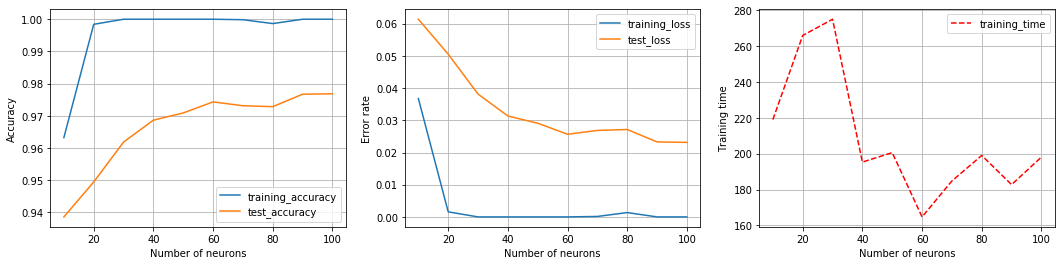

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.plot(nb_neurons, training_scores, label = "training_accuracy")
plt.plot(nb_neurons, test_scores, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neurons")
plt.legend()
plt.grid()

plt.subplot(132)
plt.plot(nb_neurons, training_loss, label = "training_loss")
plt.plot(nb_neurons, test_loss, label = "test_loss")
plt.ylabel("Error rate")
plt.xlabel("Number of neurons")
plt.legend()
plt.grid()

plt.subplot(133)
plt.plot(nb_neurons, training_time,'r--', label = "training_time")
plt.ylabel("Training time")
plt.xlabel("Number of neurons")
plt.legend()
plt.grid()

plt.show()

plt.savefig('TP2-acc-loss-vs-nb-neurons.png')

### ***3.1. Number of layers***

In [0]:
%%time
layers_sizes = []
training_scores, training_loss = [], []
test_scores, test_loss = [], []
training_time = []
nb_layers = np.arange(1,10,1)
for i in nb_layers:
  print("Training with {} hidden layer(s) ...".format(i+1))
  layers_sizes.append(50)
  mlp = MLPClassifier(hidden_layer_sizes=layers_sizes,verbose=0)
  start = time.clock()
  mlp.fit(X_train,y_train)
  exec_time = time.clock() - start 
  training_time.append(exec_time)
  print("Execution time : ", exec_time)
  training_scores.append(mlp.score(X_train, y_train))
  test_scores.append(mlp.score(X_test, y_test))
  training_loss.append(zero_one_loss(y_train,mlp.predict(X_train)))
  test_loss.append(zero_one_loss(y_test,mlp.predict(X_test)))

Training with 2 hidden layer(s) ...
Execution time :  208.08646899999985
Training with 3 hidden layer(s) ...
Execution time :  165.12093499999992
Training with 4 hidden layer(s) ...
Execution time :  147.06838300000027
Training with 5 hidden layer(s) ...
Execution time :  170.92302100000006
Training with 6 hidden layer(s) ...
Execution time :  240.07501700000012
Training with 7 hidden layer(s) ...
Execution time :  275.0185220000003
Training with 8 hidden layer(s) ...
Execution time :  212.3262620000005
Training with 9 hidden layer(s) ...
Execution time :  295.7944929999994
Training with 10 hidden layer(s) ...
Execution time :  511.46797100000003
CPU times: user 26min 1s, sys: 11min 39s, total: 37min 40s
Wall time: 19min 8s


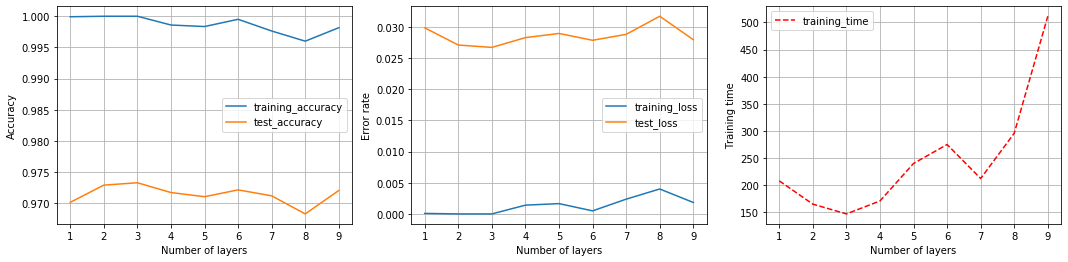

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.plot(nb_layers, training_scores, label = "training_accuracy")
plt.plot(nb_layers, test_scores, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of layers")
plt.legend()
plt.grid()

plt.subplot(132)
plt.plot(nb_layers, training_loss, label = "training_loss")
plt.plot(nb_layers, test_loss, label = "test_loss")
plt.ylabel("Error rate")
plt.xlabel("Number of layers")
plt.legend()
plt.grid()

plt.subplot(133)
plt.plot(nb_layers, training_time,'r--', label = "training_time")
plt.ylabel("Training time")
plt.xlabel("Number of layers")
plt.legend()
plt.grid()

plt.show()

plt.savefig('TP2-acc-loss-vs-nb-layers.png')

print("Best nb of layers : ",np.argmax(test_scores))

### ***3.2. Optimization algos : L-BFGS, SGD, Adam***

In [0]:
def mini_batch_learning(optimi_algo='adam',alpha=1e-4,activation='relu') : 

    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, 
                        alpha=alpha, 
                        activation = activation,
                        solver=optimi_algo, 
                        verbose=0, tol=1e-8, random_state=1,
                        learning_rate_init=.01)

    """ 
    Mini-batch learning with a specific optimisation algo (i.e. 'sgd' or 'adam')
    This function does not work with 'lbfgs' algo because it is not a stochastic algo
    """
    N_TRAIN_SAMPLES = X_train.shape[0]
    print("Number of training samples : ",N_TRAIN_SAMPLES)
    N_EPOCHS = 31
    N_BATCH = 128
    N_CLASSES = np.unique(y_train)

    scores_train = []
    scores_test = []

    # EPOCH
    epoch = 0
    while epoch < N_EPOCHS:
        if (epoch) % 10 == 0:
            print('epoch: ', epoch)
        # SHUFFLING
        random_perm = np.random.permutation(X_train.shape[0])
        mini_batch_index = 0
        while True:
            # MINI-BATCH
            indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
            mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
            mini_batch_index += N_BATCH

            if mini_batch_index >= N_TRAIN_SAMPLES:
                break

        # SCORE TRAIN
        scores_train.append(mlp.score(X_train, y_train))

        # SCORE TEST
        scores_test.append(mlp.score(X_test, y_test))

        epoch += 1
    return scores_train, scores_test

**Which algo converges better and faster ?**

In [0]:
%%time
adam_scores_train, adam_scores_test = mini_batch_learning(optimi_algo='adam')
# plt.plot(adam_scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(adam_scores_test, color='red', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.legend(loc='upper left')
# plt.show()
# plt.savefig("TP2-acc-vs-nb-epoch-adam.png")

In [0]:
%%time
sgd_scores_train, sgd_scores_test = mini_batch_learning(optimi_algo='sgd')
# plt.plot(sgd_scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(sgd_scores_test, color='red', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.legend(loc='upper left')
# plt.show()
# plt.savefig("TP2-acc-vs-nb-epoch-lbfgs.png")

Number of training samples :  49000
epoch:  9
epoch:  19
epoch:  29
CPU times: user 2min 9s, sys: 1min 7s, total: 3min 16s
Wall time: 1min 42s


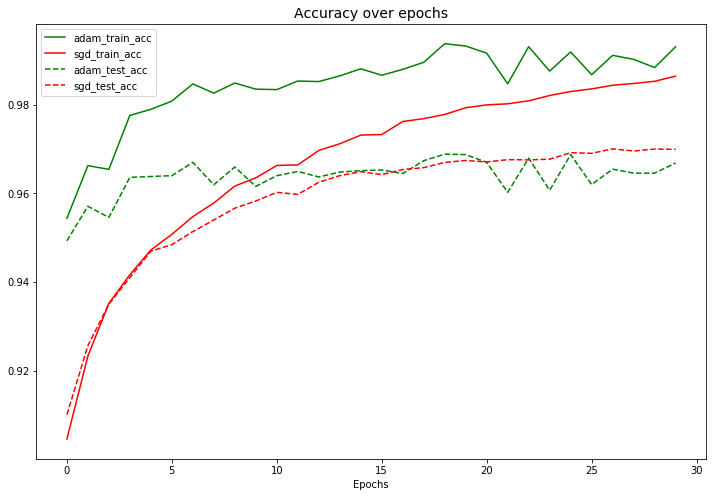

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(12,8))

plt.plot(adam_scores_train, 'g', label='adam_train_acc')
plt.plot(sgd_scores_train, 'r', label='sgd_train_acc')
plt.plot(adam_scores_test, 'g--', label='adam_test_acc')
plt.plot(sgd_scores_test, 'r--', label='sgd_test_acc')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='lower right')

plt.show()
plt.savefig("TP2-acc-vs-optimization-algo.png")

**L-BFGS performs better for small dataset ?**

In [0]:
%%time
layers_sizes = []
training_scores = []
test_scores = []
data_size = np.array([1000,2000,4000,5000,10000,20000,40000,60000])
for size in data_size:
  print("Size of data : {} samples ...".format(size))
  # take a batch of dataset
  indexes = random.sample(range(70000),size)
  X2 = mnist.data[indexes]
  y2 = mnist.target[indexes]
  X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size =0.8)

  mlp_adam = MLPClassifier(hidden_layer_sizes=50,solver='adam',verbose=0)
  mlp_adam.fit(X2_train,y2_train)

  mlp_sgd = MLPClassifier(hidden_layer_sizes=50,solver='sgd',verbose=0)
  mlp_sgd.fit(X2_train,y2_train)
  
  mlp_lbfgs = MLPClassifier(hidden_layer_sizes=50,solver='lbfgs',verbose=0)
  mlp_lbfgs.fit(X2_train,y2_train)

  print("Computing scores...")
  training_scores.append([mlp_adam.score(X2_train, y2_train),mlp_sgd.score(X2_train, y2_train),mlp_lbfgs.score(X2_train, y2_train)])
  test_scores.append([mlp_adam.score(X2_test, y2_test),mlp_sgd.score(X2_test, y2_test),mlp_lbfgs.score(X2_test, y2_test)])

training_scores = np.array(training_scores).transpose()
test_scores = np.array(test_scores).transpose()

## PLOT

plt.figure(figsize=(12,8))

plt.plot(data_size,training_scores[0], 'g', label='adam_train_acc')
plt.plot(data_size,training_scores[1], 'r', label='sgd_train_acc')
plt.plot(data_size,training_scores[2], 'b', label='lbfgs_train_acc')

plt.plot(data_size,test_scores[0], 'g--', label='adam_test_acc')
plt.plot(data_size,test_scores[1], 'r--', label='sgd_test_acc')
plt.plot(data_size,test_scores[2], 'b--', label='lbfgs_test_acc')

plt.title("Accuracy", fontsize=14)
plt.xlabel('Size of dataset')
plt.legend(loc='lower left')

plt.show()
plt.savefig("TP2-optimization-algo-vs-datasize.png")

Size of data : 1000 samples ...
Computing scores...
Size of data : 2000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 3000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 4000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 5000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 6000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 7000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 8000 samples ...


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Computing scores...
Size of data : 9000 samples ...
Computing scores...
Size of data : 10000 samples ...
Computing scores...
CPU times: user 5min 24s, sys: 2min 31s, total: 7min 55s
Wall time: 4min 1s


### ***3.3. Activation function : identity, logsitic, tanh,relu***

In [0]:
%%time
iden_scores_train, iden_scores_test = mini_batch_learning(optimi_algo='adam',activation='identity')
# plt.plot(iden_scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(iden_scores_test, color='red', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')
# plt.show()

In [0]:
%%time
log_scores_train, log_scores_test = mini_batch_learning(optimi_algo='adam',activation='logistic')
# plt.plot(log_scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(log_scores_test, color='red', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')
# plt.show()

In [0]:
%%time
tanh_scores_train, tanh_scores_test = mini_batch_learning(optimi_algo='adam',activation='tanh')
# plt.plot(tanh_scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(tanh_scores_test, color='red', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')
# plt.show()

In [0]:
%%time
relu_scores_train, relu_scores_test = mini_batch_learning(optimi_algo='adam',activation='relu')
# plt.plot(relu_scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(relu_scores_test, color='red', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')
# plt.show()

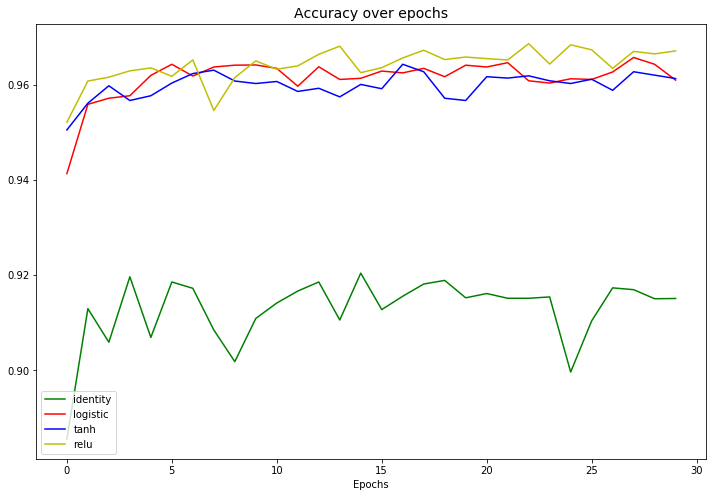

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(12,8))

plt.plot(iden_scores_test, 'g', label='identity')
plt.plot(log_scores_test, 'r', label='logistic')
plt.plot(tanh_scores_test, 'b', label='tanh')
plt.plot(relu_scores_test, 'y', label='relu')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()
plt.savefig("TP2-acc-vs-activation.png")

### ***3.4. Parameter alpha of L2 Regularization***

Number of training samples :  49000
epoch:  9
epoch:  19
epoch:  29
Number of training samples :  49000
epoch:  9
epoch:  19
epoch:  29
Number of training samples :  49000
epoch:  9
epoch:  19
epoch:  29
Number of training samples :  49000
epoch:  9
epoch:  19
epoch:  29
Number of training samples :  49000
epoch:  9
epoch:  19
epoch:  29


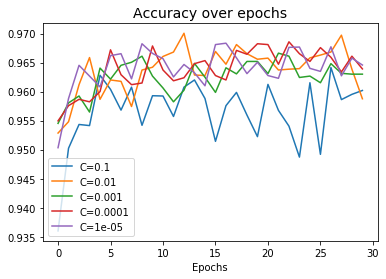

CPU times: user 10min 54s, sys: 5min 49s, total: 16min 44s
Wall time: 8min 41s


In [0]:
%%time
plt.figure(figsize=(12,8))
scores_per_C = []
for i in range(5):
    alpha = round(0.1 ** (i+1),6)
    print("Training with alpha = {}...".format(alpha))
    scores_train, scores_test = mini_batch_learning(optimi_algo='adam',activation='relu',alpha=alpha)
    scores_per_C.append(scores_test)
    plt.plot(scores_test, label='C={}'.format(alpha))

plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()
plt.savefig("TP2-acc-per-C.png")

##  **4. Best Model ???**

In [0]:
# n_layers = 3
# solver = 'adam'
# activation = 'relu'
# C = 1e-5

%%time 
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=30,solver='adam',activation='relu',verbose=1)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

---